# 1. IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import re
import string

# 2. LOAD DATASET AND DATA PREPROCESSING

In [4]:
df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df=df[:]

# 3. TEXT PREPROCESSING

In [8]:
def clean(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('<.*?>','',text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\w*\d\w*', '',text)
    text=re.sub('\n','',text)
    return text
df['clean_text'] = df['review'].apply(lambda x: clean(x))
df.head()

,review,sentiment,clean_text
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


# Model Training

In [9]:
def sent(x):
    if x=='positive':
        return 1
    else:
        return 0
df['senti'] = df['sentiment'].apply(lambda x: sent(x))
df.head()

,review,sentiment,clean_text,senti
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,1


In [10]:
from sklearn.model_selection import train_test_split
x=df.clean_text
y=df.senti
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=11)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((45000,), (5000,), (45000,), (5000,))

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
tv=TfidfVectorizer()
lr=LogisticRegression(solver='lbfgs')
from sklearn.pipeline import Pipeline

In [12]:
model=Pipeline([('vectorizer',tv),('classifier',lr)],verbose=True)
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(precision_score(ytest,pred,average ='weighted'))

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  17.1s


C:\JAVA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  13.0s
0.8972
[[2214  274]
 [ 240 2272]]
0.897266777936338


In [11]:
import pickle
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [12]:
exp = [input("Enter your review: ")]
result = model.predict(exp)
print(result)

Enter your review: good
[1]


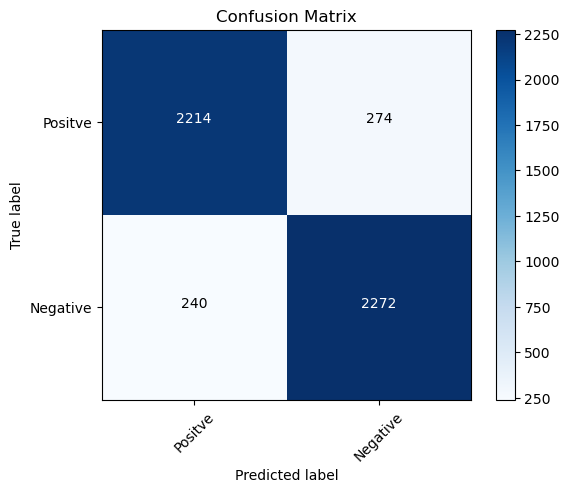

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_true) and predicted labels (y_pred)

# Calculate confusion matrix
cm = confusion_matrix(ytest, pred)

# Plot confusion matrix
labels = ['Positve', 'Negative']  # Replace with your class labels
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()


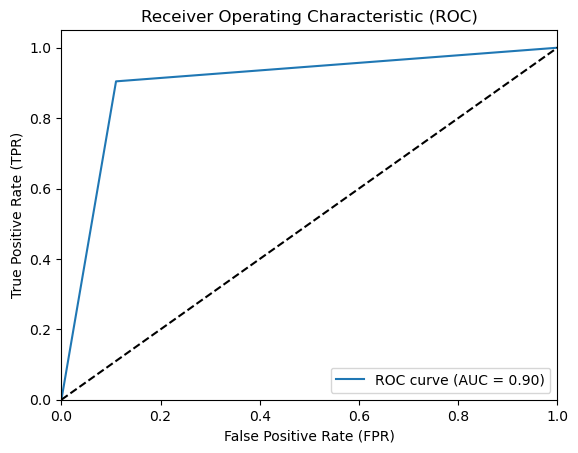

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have true labels (y_true) and predicted probabilities (y_prob)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(ytest, pred)

# Calculate AUC score
auc = roc_auc_score(ytest, pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
